In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/aneeshsallaram/Downloads/archetypes.xltm"
df = pd.read_excel(file_path, sheet_name="lineup-efficiency", engine="openpyxl")
df_team = pd.read_excel(file_path, sheet_name="team-stats", engine="openpyxl")

sns.set(style="whitegrid")

archetype_col = "Lineup archetypes"


/var/folders/71/cvpn7clj68q1lpf_6ydc7z7w0000gn/T/ipykernel_2588/522637954.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


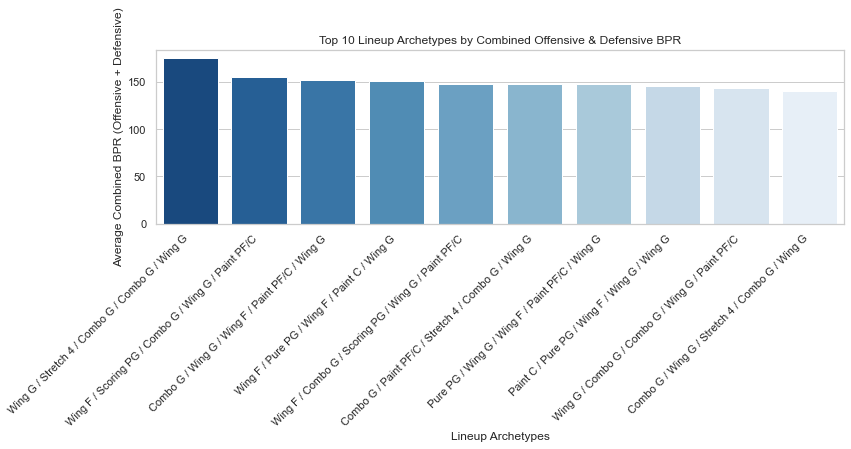

/var/folders/71/cvpn7clj68q1lpf_6ydc7z7w0000gn/T/ipykernel_2588/522637954.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


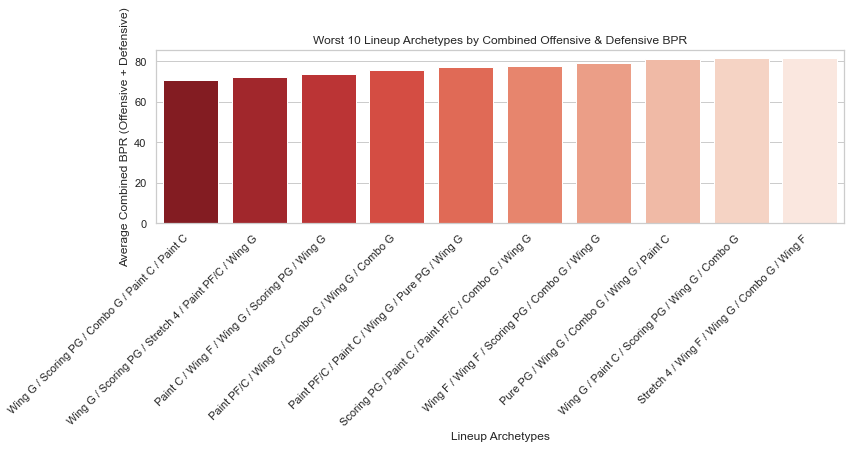

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['combined_bpr'] = df['team_off_eff'] + df['avg_opp_bpr']

archetype_avg = df.groupby(archetype_col)[["combined_bpr", "team_eff_margin", "plus_minus", "adj_team_off_eff", "adj_team_def_eff"]].mean()

top_10_bpr_archetypes = archetype_avg.sort_values("combined_bpr", ascending=False).head(10)
worst_10_bpr_archetypes = archetype_avg.sort_values("combined_bpr", ascending=True).head(10)

top_palette = sns.color_palette("Blues", n_colors=10)[::-1]
worst_palette = sns.color_palette("Reds", n_colors=10)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_bpr_archetypes,
    x=top_10_bpr_archetypes.index,
    y="combined_bpr",
    palette=top_palette
)
plt.title("Top 10 Lineup Archetypes by Combined Offensive & Defensive BPR")
plt.xlabel("Lineup Archetypes")
plt.ylabel("Average Combined BPR (Offensive + Defensive)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bottom 10 BPR Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=worst_10_bpr_archetypes,
    x=worst_10_bpr_archetypes.index,
    y="combined_bpr",
    palette=worst_palette
)
plt.title("Worst 10 Lineup Archetypes by Combined Offensive & Defensive BPR")
plt.xlabel("Lineup Archetypes")
plt.ylabel("Average Combined BPR (Offensive + Defensive)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df['combined_bpr'] = df['team_off_eff'] + df['avg_opp_bpr']

archetype_avg = df.groupby(archetype_col)[["combined_bpr", "team_eff_margin", "plus_minus", "avg_opp_bpr", "adj_team_off_eff", "adj_team_def_eff"]].mean()

top_10_bpr_archetypes = archetype_avg.sort_values("combined_bpr", ascending=False).head(10)

worst_10_bpr_archetypes = archetype_avg.sort_values("combined_bpr", ascending=True).head(10)

top_10_table = top_10_bpr_archetypes[["plus_minus", "avg_opp_bpr"]]
worst_10_table = worst_10_bpr_archetypes[["plus_minus", "avg_opp_bpr"]]

print("Top 10 Archetypes by Combined BPR (Plus-Minus & Avg Opp BPR):")
display(top_10_table)

print("\nWorst 10 Archetypes by Combined BPR (Plus-Minus & Avg Opp BPR):")
display(worst_10_table)


Top 10 Archetypes by Combined BPR (Plus-Minus & Avg Opp BPR):


,plus_minus,avg_opp_bpr
Lineup archetypes,,
Wing G / Stretch 4 / Combo G / Combo G / Wing G,34.782094,2.817567
Wing F / Scoring PG / Combo G / Wing G / Paint PF/C,40.796175,0.760227
Combo G / Wing G / Wing F / Paint PF/C / Wing G,41.766490,1.684681
Wing F / Pure PG / Wing F / Paint C / Wing G,25.389283,2.394328
Wing F / Combo G / Scoring PG / Wing G / Paint PF/C,11.956579,3.233842
Combo G / Paint PF/C / Stretch 4 / Combo G / Wing G,49.690043,3.704726
Pure PG / Wing G / Wing F / Paint PF/C / Wing G,31.788270,1.944478
Paint C / Pure PG / Wing F / Wing G / Wing G,53.308723,2.320433
Wing G / Combo G / Combo G / Wing G / Paint PF/C,30.622633,1.607302



Worst 10 Archetypes by Combined BPR (Plus-Minus & Avg Opp BPR):


,plus_minus,avg_opp_bpr
Lineup archetypes,,
Wing G / Scoring PG / Combo G / Paint C / Paint C,-38.865352,3.564374
Wing G / Scoring PG / Stretch 4 / Paint PF/C / Wing G,-45.914112,3.019636
Paint C / Wing F / Wing G / Scoring PG / Wing G,-35.786837,3.684008
Paint PF/C / Wing G / Combo G / Wing G / Combo G,-23.810149,1.577427
Paint PF/C / Paint C / Wing G / Pure PG / Wing G,-18.000000,3.745198
Scoring PG / Paint C / Paint PF/C / Combo G / Wing G,-25.113636,2.734713
Wing F / Wing F / Scoring PG / Combo G / Wing G,-12.256016,2.649212
Pure PG / Wing G / Combo G / Wing G / Paint C,-13.554545,3.159052
Wing G / Paint C / Scoring PG / Wing G / Combo G,-20.007399,1.181697


In [ ]:
import pandas as pd
from collections import Counter

file_path = "/Users/aneeshsallaram/Downloads/archetypes.xltm"
df = pd.read_excel(file_path, sheet_name="lineup-efficiency", engine="openpyxl")

df['combined_bpr'] = df['team_off_eff'] + df['avg_opp_bpr']

column_name = "Lineup archetypes(considering efficiency)"

def get_top_archetype_phrases(series, top_n=10):
    phrases = []
    for entry in series.dropna():
        for phrase in entry.split("/"):
            clean = phrase.strip()
            if clean and clean != "/":
                phrases.append(clean)
    return Counter(phrases).most_common(top_n)

top_10_percent = df.nlargest(int(len(df) * 0.10), 'combined_bpr')
bottom_10_percent = df.nsmallest(int(len(df) * 0.10), 'combined_bpr')

top_phrases = get_top_archetype_phrases(top_10_percent[column_name])
bottom_phrases = get_top_archetype_phrases(bottom_10_percent[column_name])

print("Top 10 Archetypes in Top 10% BPR Lineups:")
for phrase, count in top_phrases:
    print(f"{phrase}: {count}")

print("\nTop 10 Archetypes in Bottom 10% BPR Lineups:")
for phrase, count in bottom_phrases:
    print(f"{phrase}: {count}")



Top 10 Archetypes in Top 10% BPR Lineups:
Offensive Combo G: 36
C: 34
Wing G: 27
Offensive Wing G: 26
2-Way Wing G: 25
Combo G: 19
Offensive Scoring PG: 16
2-Way Stretch 4: 15
Offensive Stretch 4: 13
2-Way Paint PF: 13

Top 10 Archetypes in Bottom 10% BPR Lineups:
Wing G: 65
Combo G: 37
Wing F: 37
C: 32
Scoring PG: 24
Paint C: 23
Paint PF: 15
Offensive Combo G: 13
Defensive Paint C: 12
Stretch 4: 12
